UNet(
  (down1): DoubleConv(
    (conv1): Conv2d(1024, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (relu1): ReLU(inplace=True)
    (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (relu2): ReLU(inplace=True)
  )
  (pool1): PostProcess(
    (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (drop): Dropout(p=0.5, inplace=True)
  )
  (down2): DoubleConv(
    (conv1): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (relu1): ReLU(inplace=True)
    (conv2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (relu2): ReLU(inplace=True)
  )
  (pool2): PostProcess(
    (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (drop): Dropout(p=0.5, inplace=True)
  )
  (down3): DoubleConv(
    (conv1): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (relu1): ReLU(inplace=True)
    (conv2): Conv2d(256, 256, kernel_size=(

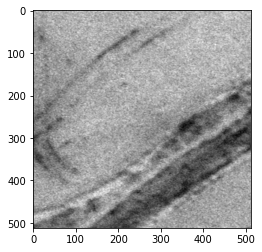

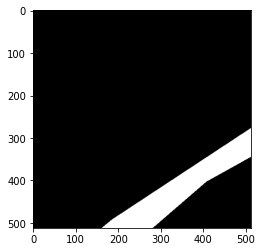

finished


In [1]:
from unet import *
from segmentation_dataset import *
from load_data import *


In [2]:
#dataloader code

import os
from torch.utils.data import DataLoader
from segmentation_dataset import SegmentationDataset
import matplotlib.pyplot as plt
import numpy as np
import torch

from torchvision import datasets, transforms

def listdir_nohidden(path):
    for f in os.listdir(path):
        if not f.startswith('.'):
            yield f

train_path = "small_dataset/images/nir/"
val_path = "small_dataset/images/nir/"
train_labels_path = "small_dataset/labels/"

train_img_names_index = os.listdir(train_path)
val_img_names_index = os.listdir(val_path)

labels_one_hot = {}
k = 9
for i, label in enumerate(listdir_nohidden(train_labels_path)):
    labels_one_hot[label] = np.zeros((k,))
    labels_one_hot[label][i] = 1

train_dataset = SegmentationDataset(train_img_names_index, labels_one_hot)
val_dataset = SegmentationDataset(val_img_names_index, labels_one_hot)
 
batch_size = 1
shuffle = True
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=shuffle)


print("finished")

finished


In [11]:
#SETTINGS
Use_GPU = True
Lr = 0.01
channels = 1 # 512*512 #pixels
classes = 10 #outputs 
maxEpochs = 100
batch_size = 1
shuffle = True

trainValRate = 0.7 #not in use
lrRatesplan = None #not in use
activation = "relu" #not in use 
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), Lr)

#Code 
if Use_GPU: 
    if torch.cuda.is_available():
        device = torch.device('cuda')
    else:
        device = torch.device('cpu')
else:
    device = torch.device('cpu')
#initalize model 

#fix activationfunc, dropout and other settings for model as parameters later 

model = UNet(channels, classes).to(device)

#two different filepaths
pathTrain = "Agriculture-Vision-2021\train"
pathVal = "Agriculture-Vision-2021\val"

train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=shuffle)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size, shuffle=shuffle)

# trainY = SegmentationDataset(train_img_names_index, labels_one_hot)
# validateY = SegmentationDataset(train_img_names_index, labels_one_hot)


In [12]:
#trainer class/object?

from tqdm import tqdm, trange

trainingLoss = []
validationLoss = []

def itterProgress(x, text = "training"):
    return tqdm(enumerate(x), text, total = len(x))

def run(): 
    itter = itterProgress(trainX)
    for i in range(maxEpochs):
        pass      

def train(): 
    
    model.train() #does this even work? 

    for i, (batch_x, batch_y) in enumerate(train_dataloader):
        indata, target = batch_x.to(device), batch_y.to(device)
        optimizer.zero_grad()

        out = model.forward(indata)
        loss = criterion(out, target)
        loss_value = loss.item()

        trainingLoss.append(loss_value)

        loss.backward()
        optimizer.step()

    
train()
print(trainingLoss)
# def validate: 


RuntimeError: Expected 4-dimensional input for 4-dimensional weight [64, 1, 3, 3], but got 3-dimensional input of size [1, 512, 512] instead